# Evaluation of the RESTful API for molar to mass concentration conversion using UCUM and LOINC

**Sam Tomioka**

**May 4, 2019**

## 1 Introduction

The verification of scientific units and conversion from the reported units to standard units have been always challenging for Data Science due to several reasons:

    1. Need a lookup table that consists of all possible input and output units for measurements, name of the measurements (e.g. Glucose, Weight, ...), conversion factors, molar weights etc.
    2. The names of the measurement in the lookup table and incoming data must match
    3. The incoming units must be in the lookup table
    4. Maintenance of the lookup table must be synched with standard terminology update
    5. Require careful medical review in addition to laborsome Data Science review
    and more...

Despite the challenges, the lookup table approach is norm for many companies for verification of the units and conversion. Consideration was give for more systematic approach that does not require to use the lab test names[1], but some units rely on molar weight and/or valence of ion of the specific lab tests, so this approach does not solve the problem. The regulatory agencies require sponsor to use standardized units for reporting and analysis[2]. The PMDA requires SI units for all reporting and analysis[3,4]. The differences in requirement force us to maintain region specific conversion for some measurements which add additional complexity.

The approach Jozef Aerts discussed uses RestAPI available through [Unified Code for Units of Measure (UCUM) Resources](https://ucum.nlm.nih.gov/ucum-lhc/index.html) which is maintained by the US National Library of Medicine[5]. The benefit is obvious that we can potentially eliminate the maintenance of the lab conversion lookup table. Here is what they say about themself.

>The Unified Code for Units of Measure (UCUM) is a code system intended to include all units of measures being contemporarily used in international science, engineering, and business. The purpose is to facilitate unambiguous electronic communication of quantities together with their units. The focus is on electronic communication, as opposed to communication between humans. A typical application of The Unified Code for Units of Measure are electronic data interchange (EDI) protocols, but there is nothing that prevents it from being used in other types of machine communication.

The UCUM is the ISO 11240 compliant standard and has been used in ICSR E2B submissions for regulators adopted ICH E2B(R3). [FDA requires the UCUM codes](https://www.fda.gov/industry/fda-resources-data-standards/units-measurement) for the [eVAERS ICSR E2B (R3) submissions](https://www.fda.gov/media/98617/download), [dosage strength in both content of product labeling](https://www.fda.gov/industry/fda-resources-data-standards/structured-product-labeling-resources) and [Drug Establishment Registration and Drug Listing](https://www.fda.gov/regulatory-information/search-fda-guidance-documents/providing-regulatory-submissions-electronic-format-drug-establishment-registration-and-drug-listing).   

### 1-1 Update May 2019
Jozef Aerts [announced](http://www.xml4pharma.com/UCUM/Instructions_for_testing_the_RESTful_web_service_for_molar_mass_unit_conversions.pdf) a updated RESTful API which accounts for the molecular weights of the analyte into the conversion between molar and mass concentrations. This additional functionality would faciliate the conversion of the lab results, verification of the standardized lab results and LOINC code provided by the vendors.

Although CDISC released a downloadable [CDISC UNIT and UCUM mapping xlsx file](https://www.cdisc.org/standards/terminology), this evaluation will not use it since CDISC UNIT does not cover all reported units used by the clinical laboratory/bioanalytical/PK vendors. Regular expression along with UCUM unit validity service were used to convert and verify the units provided by the lab vendors.

Initial evaluation was done on RestAPI available through [Unified Code for Units of Measure (UCUM) Resources](https://ucum.nlm.nih.gov/ucum-lhc/index.html) and the findings are summarized in **2-1**.
The second evaluation is completed on the test version of RestAPI provided by Jozef Aerts at [xml4pharma](http://www.xml4pharma.com/)

## 2 Findings
### 2-1 Prior Work

Previoiusly the production version of RestAPI provided by US National Library of Medicine was evaluated. See [here](usum_201902.ipynb) for more detail.

6458 laboratory records were used to test UCUM RestAPI. These records are from one of the ongoing clinical trial with standard set of clinical laboratory tests.
Out of 6458 records, there were 321 records identified as incorrect conversions. 
Out of 322 findings, 169 was false positive which is due to lack of accounting valence of ion with respect to mEq to molar unit conversion.

|--|Records|
|--|--|
|Total Records|6458|
|Identified as incorrect conversion|321|
|True Positive|153|
|False Positive|169|



2142 records were identified as error. Out of 2142 errors, 120 records identified as error due to having a categorical data despite unit was given. 
There were 2022 records where the source and target unit do not have the same property. Most of them are cause by lack of mass-mol conversions, and the rest appeared to be correct but medical judgement would be neccessary.

|Type of Error|Records|
|--|--|
|ERROR: unexpected result: Error: Source and Target unit do not seem to belong to the same property|2022|
|ERROR: unexpected result: NEGATIVE is not a numeric value|119|
|ERROR: unexpected result: Negative is not a numeric value|1|


Overall, this approach worked for majority of the records 6458, however, a few improvements are required by NLM/NIH to full utilize this RestAPI.

1. Need for mass-mol conversions \*
2. Need to account for valence of ion with respect to mEq to molar unit conversion
3. Need for an option to specify molar weight or LOINC code for accurate unit conversion with respect to molar unit.

### 2-2 Findings on 'molar-mass' conversion with LOINC  (May 2019)




## Thought

This approach has potential and can be used for any units (PK, Lab, ECG, Vital Signs etc). With addition of mass-mol conversion in near future, we could replace the current lab conversion lookup. However, initial implementation of mass-mol conversion may require us to supply molar weight during API request which will prohibit us from completely get rid of the existing lookup table. Additional verifications such as LBCAT-LBTEST-LBTESTCD unique pair, on lab data will be required separately. Addition of LOINC is thus strongly desired.

[1] Wu and Wales (2017) [Laboratory Data Standardization with SAS ](https://www.pharmasug.org/proceedings/2017/AD/PharmaSUG-2017-AD10.pdf). PharmaSUG

[2] FDA (2013). [Position on Use of SI Units for Lab Tests - FDA](https://www.fda.gov/downloads/ForIndustry/DataStandards/StudyDataStandards/UCM587505.pdf)

[3] PMDA. (2015) [Notification on Practical Operations of Electronic Study Data Submissions](https://www.pmda.go.jp/files/000206451.pdf)

[4] PMDA (2017). [FAQs on Electronic Study Data Submission (Excerpt)](https://www.pmda.go.jp/english/review-services/reviews/advanced-efforts/0007.html)

[5] Jozef Aerts (2019) [SDTM --STRESN: why we need UCUM](http://cdiscguru.blogspot.com/2019/02/sdtm-stresn-why-we-need-ucum.html)

**Something to note:**

The units used in API call has to be compliant with the [USUM specifications](http://unitsofmeasure.org/ucum.html). In addition, URL encoding has to be applied for some special characters. URL encoding can be found [here](https://en.wikipedia.org/wiki/Percent-encoding). 

## 3 Scripts
### 3-1 Initialization

In [1]:
import boto3
import botocore
import re
import os
import pandas as pd
import pandas_profiling as pp
import pixiedust as px

# Visual
%matplotlib inline

# my utilities
from lib.ucum import *

bucket='snvn-sagemaker-1' #data bucket
s3 = boto3.resource('s3')
url='http://xml4pharmaserver.com:8080/UCUMService2/rest'

Pixiedust database opened successfully


###  3-2 Copy data to notebook

In [2]:
KEY=os.path.join('mldata','Sam','data','project','pool','lb.sas7bdat') 
os.makedirs('data', exist_ok=True)

try:
    s3.Bucket(bucket).download_file(KEY, os.path.join('data','sdtm_lb.sas7bdat'))
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise 

### 3-3 Retain records for verification

In [3]:
rlb=pd.read_sas('data/raw_lb.sas7bdat',encoding='latin')
print('Number of studies: ',len(list(set(rlb['STUDYID']))))
df=rlb[['LBTESTCD','LBTEST','LBORRES','LBORRESU','LBSTRESU','LBSTRESN','LBLOINC']]
#df=df[df['LBORRESU']!='LBSTRESU'] #since we don't need to verify
print('Number of records in the input: ',df.shape)

#Cleaning Input Data
df1=df.copy()
df1.dropna(axis=0, subset=['LBORRESU'], inplace=True)
df1['ge']=df1['LBORRES'].str.findall(r'<')
df1['LBORRES']=df1['LBORRES'].str.replace(r'<','')
print('Removed records with missing units: ', df1.shape)
#Remove records not needed for verification
#1. results contain character
df1['LBORRES']=df1['LBORRES'].str.replace(r'[a-zA-Z ]+','XXX')

df1=df1[df1['LBORRES']!='XXX']
print('Removed records with character results: ',df1.shape)
#2. both units are the same
df1=df1[df1['LBORRESU']!=df1['LBSTRESU']]
print('Removed records do not require conversion: ',df1.shape)

Number of studies:  17
Number of records in the input:  (419103, 7)
Removed records with missing units:  (281410, 8)
Removed records with character results:  (265083, 8)
Removed records do not require conversion:  (176265, 8)


Let's see what units have been used in the input datasets

(<module 'matplotlib.pyplot' from '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa44dfdf0f0>)

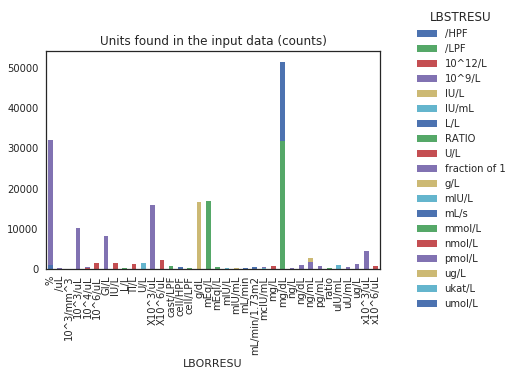

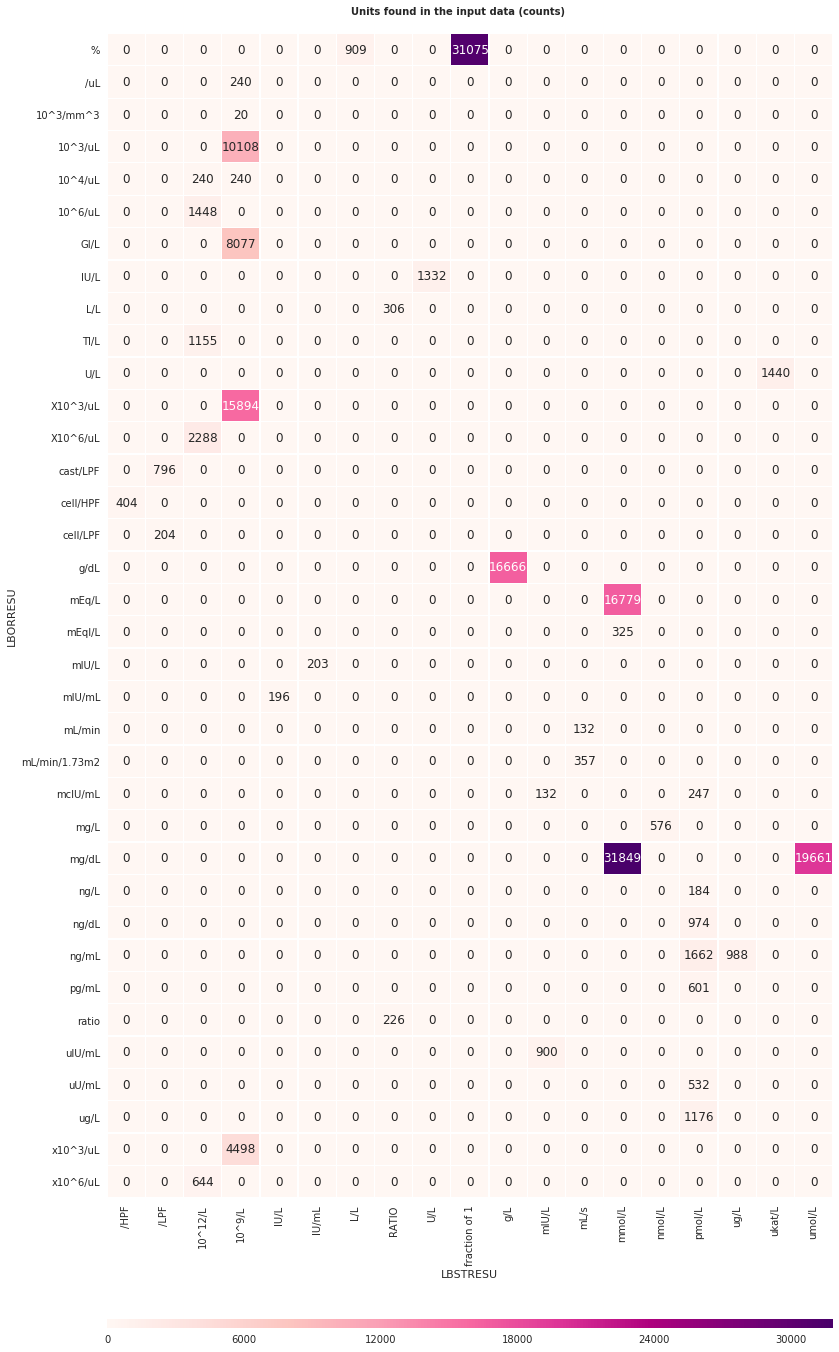

In [4]:
bar_hm(df1,'Units found in the input data (counts)')

There are several conventional units mapped to more than one SI units.

### 3-4 Define regular expression used to convert the input units to UCUM

In [5]:
#Regular expressions. --- update this based on raw data
patterns = [("%","%25"),
           ("\A[xX]?10[^E]", "10*"),
           ("IU", "%5BIU%5D"),
           ("\Anan", ""),
           ("\ANONE", ""),
           ("\A[rR][Aa][Tt][Ii][Oo]", ""),
           ("\ApH", ""),            
           ("Eq[l]?","eq"),
           ("\ATI/L","T/L"),
           ("\AGI/L","G/L"),
           ("V/V","L/L"),
           ("[a-z]{0,4}/HPF","/%5BHPF%5D"),
           ("[a-z]{0,4}/LPF","/%5BLPF%5D"), 
           ("fraction of 1","1"),
            ("sec","s"),
            ("1.73m2","%7B1.73_m2%7D")       
           ]

### 3-5 Functions used
1. cleanlist: a helper function which takes the elements of patterns to output UCUM conformant unit
2. orresu2ucum: a function which takes the dataframe containing LBORRESU and LBSTRESU, and apply `cleanlist`
3. ucumVerify: a function which takes the list of units to verify the conformance to UCUM using `isValidUCUM` and returns a list with either True or False. 
4. convert_unit: a function which takes the dataframe containing LBORRESU and LBSTRESU in UCUM and returns a dataframe where original LBSTRESN is not equal to LBSTRESN from the [UCUM-LHC Converter](https://ucum.nlm.nih.gov/ucum-lhc/demo.html)

### 3-6 Verify converted UCUM

In [6]:
dfconverted, ucumlist=orresu2ucum(df1,patterns)
ucumVerify(ucumlist, url)

['g/dL = true',
 'mg/dL = true',
 'ng/mL = true',
 '10*3/uL = true',
 '%25 = true',
 '10*6/uL = true',
 '10*3/mm3 = true',
 'meq/L = true',
 'mL/min = true',
 'ng/L = true',
 'ng/dL = true',
 'u%5BIU%5D/mL = true',
 '10*3/uL = true',
 '10*6/uL = true',
 'uU/mL = true',
 'mg/L = true',
 'meq/L = true',
 'G/L = true',
 'ug/L = true',
 'T/L = true',
 'm%5BIU%5D/mL = true',
 '10*3/uL = true',
 '10*6/uL = true',
 'pg/mL = true',
 '%5BIU%5D/L = true',
 '/%5BHPF%5D = true',
 'U/L = true',
 '10*4/uL = true',
 '/uL = true',
 'L/L = true',
 'm%5BIU%5D/L = true',
 '/%5BLPF%5D = true',
 '/%5BLPF%5D = true',
 '/%5BHPF%5D = true',
 'mL/min/%7B1.73_m2%7D = true',
 'u%5BIU%5D/mL = true',
 'g/L = true',
 'umol/L = true',
 'mmol/L = true',
 '10*9/L = true',
 '10*12/L = true',
 'mL/s = true',
 '1 = true',
 'pmol/L = true',
 'nmol/L = true',
 'ukat/L = true',
 '%5BIU%5D/mL = true',
 '/%5BLPF%5D = true']

(<module 'matplotlib.pyplot' from '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa44e5c3710>)

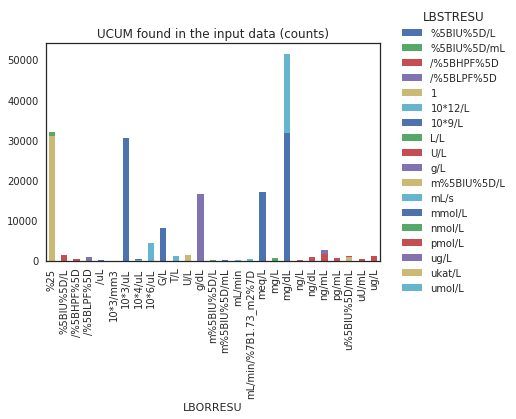

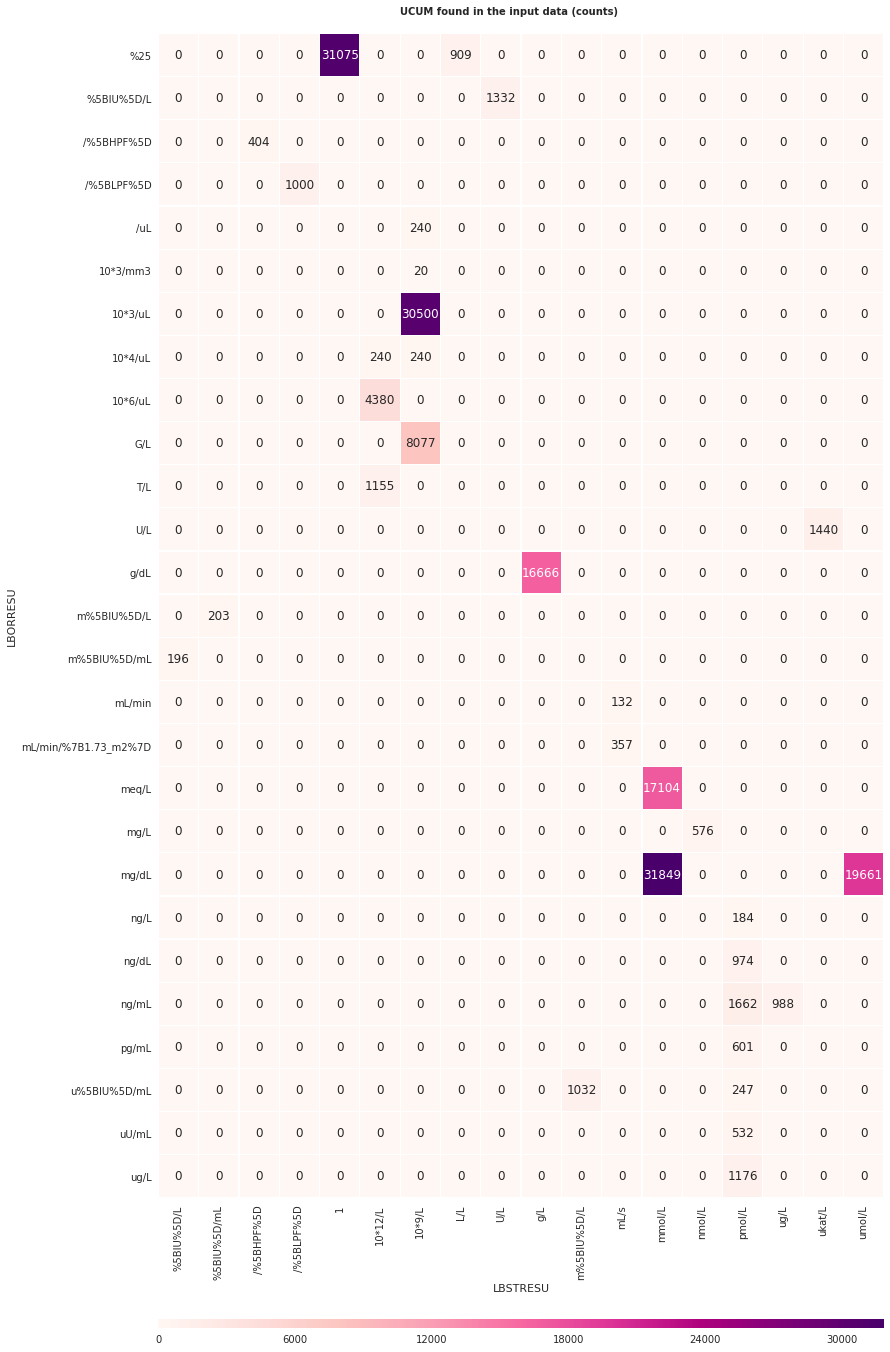

In [7]:
bar_hm(dfconverted,'UCUM found in the input data (counts)')

### 3-7 Verify Conversion

In [8]:
smdf=df1[0:1000]
smdf.reset_index(drop=True, inplace=True)

In [9]:
findings,full,response=convert_unit(smdf, url, patterns,loinconly=0)

## 4 Output Issues

### 4-1 Discrepancies between LBSTRESN and Conversion based on UCUM

In [10]:
discrepant=findings[(findings['fromucum'].notnull())]
diff=discrepant.copy()
diff['diff']=np.array(discrepant['LBSTRESN'])-np.array(discrepant['fromucum'])
diff.dropna(axis=0, how='any',subset=['diff'], inplace=True)        
dfpiv=diff.pivot(columns='LBTESTCD', values='diff')
difftests=len(dfpiv.columns)

**Check differences between reported LBSTRESN vs Converted Results**

In [11]:
dfpiv.describe()

LBTESTCD,BILI,CREAT,GLUC,URATE
count,16.000000,16.000000,16.000000,16.000000
mean,-0.137547,0.073108,0.009257,-0.000281
std,0.591848,0.210762,0.015262,0.001917
min,-0.841431,-0.285714,-0.018133,-0.002762
25%,-0.624199,-0.032532,0.001576,-0.001988
50%,-0.262147,0.090523,0.014695,-0.000524
75%,0.579284,0.166549,0.018748,0.001263
max,0.737853,0.438472,0.027658,0.002579


In [12]:
#pp.ProfileReport(dfpiv)
px.display(dfpiv)

BILI,CREAT,GLUC,URATE
-0.841431,nan,nan,nan
nan,0.13437100000000157,nan,nan
nan,nan,-0.006685300000000005,nan
nan,nan,nan,0.002321310000000021
-0.2621470000000006,nan,nan,nan
nan,-0.2857139999999987,nan,nan
nan,nan,0.015344500000000316,nan
nan,nan,nan,0.002579229999999988
0.5792845,nan,nan,nan
nan,0.09052300000000457,nan,nan


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa44c5ea240>,
      dtype=object)

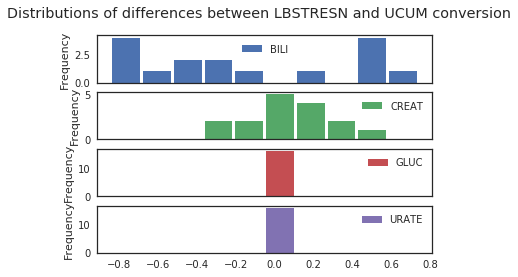

In [13]:
diff.pivot(columns='LBTESTCD', values='diff').plot(kind='hist', subplots=True, rwidth=0.9, align='mid', title='Distributions of differences between LBSTRESN and UCUM conversion')

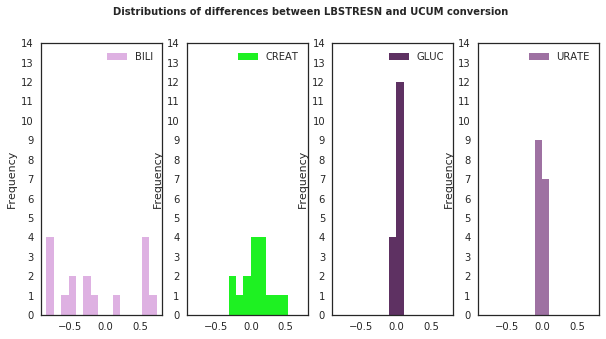

In [14]:
plt.subplots(1, difftests, sharex=True, figsize=(10,5))

idx = np.arange(1, difftests+1)
for i, col, c in zip(idx, dfpiv.columns, colors(difftests)):
    plt.subplot(1, difftests, i)
    dfpiv.loc[:, col].plot.hist(label=col, color=c, range=(diff['diff'].min(), diff['diff'].max()), bins=15)
    plt.yticks(np.arange(15))
    plt.suptitle('Distributions of differences between LBSTRESN and UCUM conversion', fontsize=10, fontweight='bold')

    plt.legend()

### 4-2 List of records in which UCUM conversion was unable to perform

In [15]:
ucumfail=findings[(findings['fromucum'].isnull())]

In [16]:
ucumfail.describe()

,LBSTRESN,fromucum
count,190.000000,0.0
mean,73.888947,NaN
std,110.834284,NaN
min,2.200000,NaN
25%,5.925000,NaN
50%,9.250000,NaN
75%,89.750000,NaN
max,482.000000,NaN


In [17]:
full['response']=pd.DataFrame(response).iloc[:,4]
full.dropna(axis=0, how='any',subset=['response'], inplace=True)
errormsg=full.groupby(['LBTESTCD','response']).count().iloc[:,0].reset_index()
errormsg.columns=['LBTESTCD','RESPONSE','COUNT']
errormsg

,LBTESTCD,RESPONSE,COUNT
0,BILI,ERROR: invalid double for Molecular Weight val...,35
1,CREAT,ERROR: invalid double for Molecular Weight val...,35
2,GLUC,ERROR: invalid double for Molecular Weight val...,35
3,URATE,ERROR: invalid double for Molecular Weight val...,35
4,UREAN,ERROR: No MW value for the LOINC code 3094-0 i...,16
5,UREAN,ERROR: invalid double for Molecular Weight val...,34


Text(0.5,0,'Count')

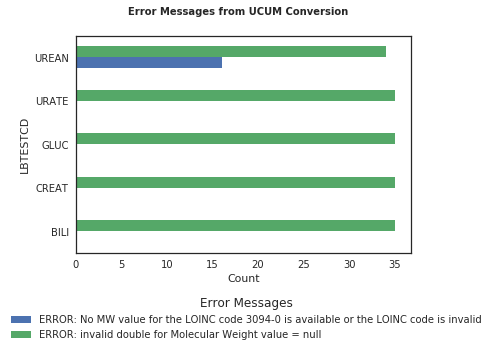

In [18]:
ax4 = errormsg.pivot('LBTESTCD','RESPONSE','COUNT').plot(kind='barh')
plt.legend(title='Error Messages',loc=5, bbox_to_anchor=(1.24, -0.3))
plt.suptitle('Error Messages from UCUM Conversion', fontsize=10, fontweight='bold')
plt.xlabel("Count")

In [19]:
pp.ProfileReport(dfpiv)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ec2-user/anaconda3/envs/python3/li

Number of variables,5
Number of observations,64
Total Missing (%),60.0%
Total size in memory,2.6 KiB
Average record size in memory,41.2 B
Numeric,5
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0
